In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

In [184]:
# se importan los datasets

df_1=pd.read_parquet("../Datasets/df_1.parquet")
df=pd.read_csv("../Datasets/df.csv")

## Datasets

In [99]:
# Datasets de las plataformas
df.head(2)

,id,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,plataforma,duration_int,duration_type
0,as1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,r,comedy,a small fishing village must procure a local d...,amazon,113.0,min
1,as2,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,tv shows,a metro family decides to fight a cyber crimin...,amazon,110.0,min


In [185]:
df=df[['id', 'title']]
df

,id,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker
...,...,...
22993,hs3069,star trek: the original series
22994,hs3070,star trek: voyager
22995,hs3071,the fades
22996,hs3072,the twilight zone


In [203]:
# Dataset de los scores a las peliculas/series 

df_1.head(4)

,user,id,score
0,1,as680,1.0
1,1,ns2186,4.5
2,1,hs2381,5.0
3,1,ns3663,5.0


In [186]:
# Se elimina la variable 'year_scored' del dataframe

df_1=df_1[['user', 'id', 'score']]
df_1

,user,id,score
0,1,as680,1.0
1,1,ns2186,4.5
2,1,hs2381,5.0
3,1,ns3663,5.0
4,1,as9500,5.0
...,...,...,...
11024284,124380,ns5272,4.5
11024285,124380,ns5492,2.5
11024286,124380,hs305,3.5
11024287,124380,ns7881,4.5


## Modelo

Se lee y analiza el conjuntos de datos de las calificaciones. La escala de calificación se establece en un mínimo de 0.5 y un máximo de 5, con incrementos de 0.5 unidades.<br>
Por el tamaño del dataset, se genera un umbral. 

In [187]:
# Se modela df_1 con el total de los valores de score. 
# Se establece un limite de 100000 datos para df_1. 

lim = 100000 

reader = Reader(rating_scale=(0.5,5))

data = Dataset.load_from_df(df_1[:lim], reader)

In [188]:
# se separa los datos

trainset, testset = train_test_split(data, test_size=0.25)

In [189]:
# Se instancia y se entrena el modelo SVD 

modelo_svd = SVD()

# Se entrena el modelo

modelo_svd.fit(trainset)

In [190]:
# Se realiza una predicción con los datos testeados

predic = modelo_svd.test(testset)

## Predicción a usuario

In [191]:
# Se realiza una predicción a un id y un score determinado

user_id = '66258'
movie_id = 'ds1370'
r_ui = 4
modelo_svd.predict(user_id, movie_id, r_ui=r_ui, verbose=True)

user: 66258      item: ds1370     r_ui = 4.00   est = 3.52   {'was_impossible': False}


Prediction(uid='66258', iid='ds1370', r_ui=4, est=3.5183912081326625, details={'was_impossible': False})

In [85]:
# Se toma un usuario aleatorio para hacerle una recomendación

user_azar=df_1.sample(1)
user_azar

,user,id,score
1212403,12455,ns7618,5.0


In [192]:
usuario = 12455

rating = 4 # Se toma  películas a las que haya calificado con 4 o 5 estrellas

df_user = df_1[(df_1['user'] == usuario) & (df_1['score'] >= rating)]
df_user = df_user.reset_index(drop=True)
df_user

,user,id,score
0,12455,hs2245,4.5
1,12455,as8452,4.5
2,12455,ns2942,4.0
3,12455,ns4141,5.0
4,12455,as1382,4.5
...,...,...,...
119,12455,as1274,5.0
120,12455,as8759,5.0
121,12455,ns4183,4.5
122,12455,ns1420,5.0


In [193]:
# se crea un dataframe con  el id pelicula y el titulo de df

df_pelicula = df

# Se une los dos dataframe por el id para ver el nombre de la id de la pelicula.

df_user=pd.merge(df_user,df_pelicula,how='inner',on='id') 

print (f'Las peliculas que el usuario {usuario} calificó por arriba de 4 en el score a {len(df_user)} películas') 
df_user

Las peliculas que el usuario 12455 calificó por arriba de 4 en el score a 124 películas


,user,id,score,title
0,12455,hs2245,4.5,the act
1,12455,as8452,4.5,a war
2,12455,ns2942,4.0,locke & key
3,12455,ns4141,5.0,lego marvel super heroes: guardians of the galaxy
4,12455,as1382,4.5,paradise canyon - digitally remastered
...,...,...,...,...
119,12455,as1274,5.0,power douglas
120,12455,as8759,5.0,act 2 - title 6
121,12455,ns4183,4.5,soni
122,12455,ns1420,5.0,last tango in halifax


Se crea un sample de 5000 películas para recomendar al usuario.

In [194]:
# Muestra de 5000 peliculas

peli_recomienda=df.sample(5000)
peli_recomienda=peli_recomienda.reset_index(drop=True)
peli_recomienda

,id,title
0,as4656,tom segura: completely normal
1,hs1003,"hello, my name is doris"
2,as7727,karma cartel
3,hs2023,looking for alaska
4,ns4242,secrets in the hot spring
...,...,...
4995,as8188,street dogs of south central
4996,ds850,disney's recess
4997,as5304,bachna ae haseeno
4998,as4343,babybus - nursery rhymes & kids songs (volume 1)


In [195]:
#Se valida cuales de la muestra el usuario ya  ha visto

usuario_vistas = df_1[df_1['user'] == usuario].reset_index()
print(f'el usuario {usuario} ha visto y calificado {len(usuario_vistas)} peliculas')
usuario_vistas

el usuario 12455 ha visto y calificado 144 peliculas


,index,user,id,score
0,1212341,12455,hs2245,4.5
1,1212342,12455,as857,2.5
2,1212343,12455,as8452,4.5
3,1212344,12455,ns367,3.5
4,1212345,12455,hs290,1.5
...,...,...,...,...
139,1212480,12455,as8759,5.0
140,1212481,12455,ns4183,4.5
141,1212482,12455,ns1420,5.0
142,1212483,12455,ns1329,4.0


In [196]:
# Se elimina del sample de 5000 peliculas que elusuario ha visto

peli_recomienda = peli_recomienda[~peli_recomienda['id'].isin(usuario_vistas['id'])]
peli_recomienda

In [201]:
# Se crea la columna de recomendaciones

peli_recomienda['Esti_Score'] = peli_recomienda['id'].map(lambda x: modelo_svd.predict(usuario, x).est)
peli_recomienda.sort_values('Esti_Score', ascending=False)

C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_10552\2500838038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peli_recomienda['Esti_Score'] = peli_recomienda['id'].map(lambda x: modelo_svd.predict(usuario, x).est)


,id,title,Esti_Score
4239,ns2558,scissor seven,3.956458
2381,ns5249,the lion woman,3.946876
2481,ns1794,sarah cooper: everything's fine,3.932938
2038,ns7841,rebelde,3.926853
2834,as5735,plug love,3.907473
...,...,...,...
1690,ds428,disney junior t.o.t.s.: calling all t.o.t.s. (...,3.067504
828,ns2919,the ghost and the tout,3.053321
1436,ds701,coco (in spanish),3.020062
4595,as4264,15-minute total body tone-up 8.0 workout (with...,3.005325


## Evaluación del modelo

In [215]:
from surprise.model_selection import cross_validate
from surprise import accuracy

In [208]:
# Se Evalua el modelo desarollado

accuracy.rmse(predic)

RMSE: 0.9582


0.9582141890615571

In [216]:
cross_validate(modelo_svd, data, measures=['RMSE', 'MAE'], cv = 3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9612  0.9579  0.9624  0.9605  0.0019  
MAE (testset)     0.7502  0.7458  0.7490  0.7484  0.0019  
Fit time          5.34    4.28    8.96    6.20    2.00    
Test time         7.49    2.98    3.62    4.70    1.99    


{'test_rmse': array([0.96123604, 0.95789176, 0.96242575]),
 'test_mae': array([0.75024658, 0.7458239 , 0.74902161]),
 'fit_time': (5.344351291656494, 4.2825398445129395, 8.958652257919312),
 'test_time': (7.492570638656616, 2.9814836978912354, 3.6166622638702393)}

## Optimización de hiperparámetros

Se plantea la optimización para todo el dataframe df_1. Sin utilizar el umbral

In [213]:
rmse_test_means = []
factores = [1,2,4,8,16,32,64,128]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9459  0.9548  0.9475  0.9494  0.0039  
Fit time          2.70    1.74    1.86    2.10    0.43    
Test time         1.56    7.83    0.98    3.46    3.10    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9594  0.9454  0.9441  0.9496  0.0070  
Fit time          2.82    2.29    3.03    2.71    0.31    
Test time         1.05    1.75    6.43    3.08    2.39    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9540  0.9502  0.9452  0.9498  0.0036  
Fit time          3.21    2.60    1.47    2.43    0.72    
Test time         2.00    1.72    1.03    1.58    0.41    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9501  0.9

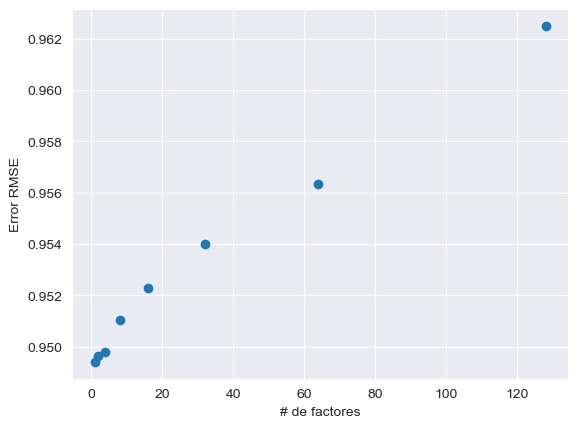

In [224]:
# Tema para los graficos
sns.set_style("darkgrid")

# Se Plotea el  desempeño según cantidad de factores de SVD

plt.scatter(factores, rmse_test_means)
plt.xlabel('# de factores')
plt.ylabel('Error RMSE')
plt.show()

## Interfax Modelo

In [233]:
import gradio as gr

Se genera funcciones para mejorar la consulta de nuestro modelo. Se desarrolla una interfax para el sistema utilizando  la libreria Gradio


In [229]:
# Creo una función para averiguar el nombre de película 

def get_titulo_movie(id):
    return df[df.id == id].title.iloc[0].title()

get_titulo_movie('as2340')


('Recomendada', 3.9831670695038652)

In [230]:
def movie_recomenda(user, movieid):
    # Se obtiene la predicción de la calificación que el usuario le daría a la película
    prediction = modelo_svd.predict(user, str(movieid))

    # Si la predicción es mayor o igual a 3.7, se recomienda la película
    if prediction.est >= 3.7:
        return "Recomendada", prediction.est
    else:
        return "No recomendada", prediction.est

movie_recomenda(1,'ns65')    

('Recomendada', 3.9831670695038652)

In [231]:
# Se unifica las dos funciones 

def functions(userid, id):
    recommended, score = movie_recomenda(userid, id)
    title = get_titulo_movie(id)
    return (recommended, score, title)

In [235]:
title = str("Recomendación de movies/series")

with gr.Blocks(title= title) as demo:
    text = gr.components.HTML("""<h1>Modelo de recomendación de películas</h1>""")
    userid = gr.inputs.Number(label="id de usuario")
    id = gr.Textbox(label="id de la película")
    get_recommendation_btn = gr.Button("La película seleccionada es:")
    title = gr.Textbox(label = "Nombre de la película:")
    output = gr.Textbox(label="¿La película seleccionada es recomendada para tí?")
    score = gr.Textbox(label="Puntaje:")
    get_recommendation_btn.click(fn=functions, inputs=[userid,id], outputs=[output, score, title])

demo.launch(share=True)

C:\Users\Jaime Ospino\AppData\Roaming\Python\Python39\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Jaime Ospino\AppData\Roaming\Python\Python39\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://641dd2f22d78a5ac6a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
